In [1]:
from PIL import Image
import numpy as np
import cv2
import os

In [2]:
root = "D:/College Work/Internship/AMU CSS/Dataset/dataset-resized/"

In [3]:
files_papaya = []
# r=root, d=directories, f = files
for r, d, f in os.walk(root + "papaya"):
    for file in f:
        files_papaya.append(file)
files_papaya.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

In [4]:
X = []
Y = []
for image in files_papaya[0:500]:
    img = Image.open(root + 'papaya/' + image)
    img.load()
    data = np.asarray(img)
    data = cv2.cvtColor(data, cv2.COLOR_BGRA2BGR)
    X.append(data)
    Y.append(0)

In [5]:
files_pepper = []
# r=root, d=directories, f = files
for r, d, f in os.walk(root + "pepper"):
    for file in f:
        files_pepper.append(file)
files_pepper.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

In [6]:
for image in files_pepper[0:500]:
    img = Image.open(root + 'pepper/' + image)
    img.load()
    data = np.asarray(img)
    data = cv2.cvtColor(data, cv2.COLOR_BGRA2BGR)
    X.append(data)
    Y.append(1)

In [7]:
X = np.array(X)
Y = np.array(Y)

In [8]:
print(X.shape, Y.shape)

(1000, 400, 400, 3) (1000,)


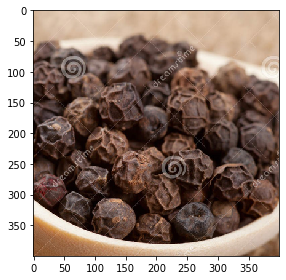

This is: Pepper


In [15]:
from skimage.io import imshow
import matplotlib.pyplot as plt

idx = int(np.random.rand(1,1)*1000)

imshow(np.squeeze(X[idx,:,:,:]))
plt.show()

labels = ['Papaya','Pepper']
print ('This is:',labels[int(Y[idx])])

In [16]:
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils
Y = np_utils.to_categorical(Y)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state=42)

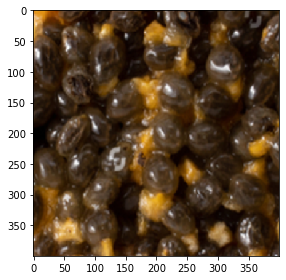

Index is: 162
This is: Papaya


In [71]:
from skimage.io import imshow
import matplotlib.pyplot as plt

idx = int(np.random.rand(1,1)*900)

imshow(np.squeeze(X_train[idx,:,:,:]))
plt.show()

print("Index is:", idx)
labels = ['Papaya','Pepper']
print ('This is:',labels[int(np.argmax(Y_train[idx], axis=0))])

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Conv2D, Flatten, Dense
import keras
import tensorflow as tf

model = Sequential()
model.add(Conv2D(input_shape=(400,400,3), filters=6, kernel_size=5, strides=1, padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4)))
model.add(Conv2D(16, kernel_size=5, strides=1, padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4)))
model.add(Flatten())
model.add(Dense(2))
model.add(Activation('softmax'))

In [19]:
model.compile(loss="categorical_crossentropy",
              optimizer='adam',
              metrics=['accuracy'])

In [20]:
verbose = 1
cnnhistory=model.fit(X_train, Y_train, epochs=100, verbose=verbose, validation_data=(X_test, Y_test))
_, accuracy = model.evaluate(X_test, Y_test, verbose=verbose)

Epoch 1/100
29/29 [==============================] - 4s 68ms/step - loss: 43.0051 - accuracy: 0.5922 - val_loss: 1.8476 - val_accuracy: 0.6000
Epoch 2/100
29/29 [==============================] - 2s 59ms/step - loss: 1.0549 - accuracy: 0.6311 - val_loss: 0.7980 - val_accuracy: 0.6700
Epoch 3/100
29/29 [==============================] - 2s 59ms/step - loss: 0.6636 - accuracy: 0.7200 - val_loss: 0.5264 - val_accuracy: 0.7600
Epoch 4/100
29/29 [==============================] - 2s 59ms/step - loss: 0.4748 - accuracy: 0.8067 - val_loss: 0.4888 - val_accuracy: 0.7700
Epoch 5/100
29/29 [==============================] - 2s 59ms/step - loss: 0.3779 - accuracy: 0.8433 - val_loss: 0.4938 - val_accuracy: 0.8300
Epoch 6/100
29/29 [==============================] - 2s 61ms/step - loss: 0.2831 - accuracy: 0.8833 - val_loss: 0.3754 - val_accuracy: 0.8500
Epoch 7/100
29/29 [==============================] - 2s 60ms/step - loss: 0.2136 - accuracy: 0.9089 - val_loss: 0.4135 - val_accuracy: 0.8400
Epoch

In [21]:
model.save("Models/cnn_adam_100_tr=100_te=91_random-42")

INFO:tensorflow:Assets written to: Models/cnn_adam_100_tr=100_te=91_random-42\assets
